In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore,boxcox
import warnings
warnings.filterwarnings('ignore')
import datetime
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [2]:
sal=pd.read_csv('SALARIES.csv')

In [3]:
sal

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41,PF,20,06-Oct,234,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0


In [4]:
#changing columns name
sal.rename(columns={'Height':'DOJ','Weight':'Days_Worked'},inplace=True)

In [5]:
#changing dtypes
sal.DOJ=pd.to_datetime(sal['DOJ'],format='%d-%b')
sal.DOJ


0     1900-02-06
1     1900-06-06
2     1900-05-06
3     1900-05-06
4     1900-10-06
         ...    
452   1900-10-06
453   1900-03-06
454   1900-01-06
455   1900-03-07
456   1900-01-07
Name: DOJ, Length: 457, dtype: datetime64[ns]

In [6]:
sal.dtypes

Name                   object
Team                   object
Number                  int64
Position               object
Age                     int64
DOJ            datetime64[ns]
Days_Worked             int64
College                object
Salary                float64
dtype: object

In [7]:
sal['date_joined'] = sal['DOJ'].dt.strftime('%d/%m')
#extracting only dd-mm to a new column


In [8]:
sal.dtypes

Name                   object
Team                   object
Number                  int64
Position               object
Age                     int64
DOJ            datetime64[ns]
Days_Worked             int64
College                object
Salary                float64
date_joined            object
dtype: object

In [9]:
sal=sal.drop(['DOJ','Name','Number','date_joined'],axis=1)
#drop date_joined as its not changing to timestamp64[ns] format after strftime operation

In [10]:
sal

,Team,Position,Age,Days_Worked,College,Salary
0,Boston Celtics,PG,25,180,Texas,7730337.0
1,Boston Celtics,SF,25,235,Marquette,6796117.0
2,Boston Celtics,SG,27,205,Boston University,NaN
3,Boston Celtics,SG,22,185,Georgia State,1148640.0
4,Boston Celtics,PF,29,231,NaN,5000000.0
...,...,...,...,...,...,...
452,Utah Jazz,PF,20,234,Kentucky,2239800.0
453,Utah Jazz,PG,26,203,Butler,2433333.0
454,Utah Jazz,PG,24,179,NaN,900000.0
455,Utah Jazz,C,26,256,NaN,2900000.0


In [11]:
sal.shape

(457, 6)

In [12]:
sal.head(7)

,Team,Position,Age,Days_Worked,College,Salary
0,Boston Celtics,PG,25,180,Texas,7730337.0
1,Boston Celtics,SF,25,235,Marquette,6796117.0
2,Boston Celtics,SG,27,205,Boston University,NaN
3,Boston Celtics,SG,22,185,Georgia State,1148640.0
4,Boston Celtics,PF,29,231,NaN,5000000.0
5,Boston Celtics,PF,29,240,NaN,12000000.0
6,Boston Celtics,PF,21,235,LSU,1170960.0


In [13]:
sal.tail(7)

,Team,Position,Age,Days_Worked,College,Salary
450,Utah Jazz,SF,28,226,NaN,2050000.0
451,Utah Jazz,SF,26,206,Dayton,981348.0
452,Utah Jazz,PF,20,234,Kentucky,2239800.0
453,Utah Jazz,PG,26,203,Butler,2433333.0
454,Utah Jazz,PG,24,179,NaN,900000.0
455,Utah Jazz,C,26,256,NaN,2900000.0
456,Utah Jazz,C,26,231,Kansas,947276.0


In [14]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 6 columns):
Team           457 non-null object
Position       457 non-null object
Age            457 non-null int64
Days_Worked    457 non-null int64
College        373 non-null object
Salary         446 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 21.5+ KB


In [15]:
sal.min()

Team           Atlanta Hawks
Position                   C
Age                       19
Days_Worked              161
Salary                 30888
dtype: object

In [16]:
sal.max()

Team           Washington Wizards
Position                       SG
Age                            40
Days_Worked                   307
Salary                    2.5e+07
dtype: object

In [17]:
sal.isnull().sum()

Team            0
Position        0
Age             0
Days_Worked     0
College        84
Salary         11
dtype: int64

In [18]:
sal['College'].mode()

0    Kentucky
dtype: object

In [19]:
sal['Salary'].mean()

4842684.105381166

In [20]:
#replacing NaN values

In [21]:
sal['College']=sal['College'].fillna(( 'Kentucky'))

In [22]:
sal['Salary']=sal['Salary'].replace(np.NaN,sal["Salary"].mean())

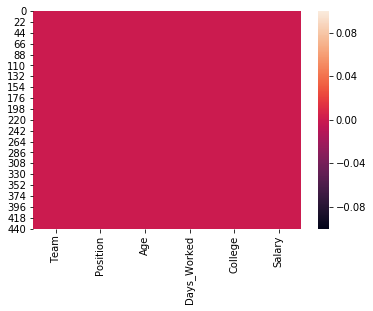

In [23]:
sns.heatmap(sal.isnull())
#no null values left

In [24]:
#checking duplicates and dropping if any

In [25]:
sal_dupli=sal.duplicated()
sal_dupli.value_counts()

False    457
dtype: int64

In [26]:

sal.describe()

,Age,Days_Worked,Salary
count,457.000000,457.000000,4.570000e+02
mean,26.938731,221.522976,4.842684e+06
std,4.404016,26.368343,5.165781e+06
min,19.000000,161.000000,3.088800e+04
25%,24.000000,200.000000,1.100602e+06
50%,26.000000,220.000000,2.869440e+06
75%,30.000000,240.000000,6.331404e+06
max,40.000000,307.000000,2.500000e+07


In [27]:
obj=['object']
sal.describe(include=obj)

,Team,Position,College
count,457,457,457
unique,30,5,118
top,New Orleans Pelicans,SG,Kentucky
freq,19,102,106


In [28]:
sal['Team'].value_counts()

New Orleans Pelicans      19
Memphis Grizzlies         18
New York Knicks           16
Milwaukee Bucks           16
Phoenix Suns              15
San Antonio Spurs         15
Utah Jazz                 15
Miami Heat                15
Washington Wizards        15
Philadelphia 76ers        15
Denver Nuggets            15
Atlanta Hawks             15
Portland Trail Blazers    15
Houston Rockets           15
Chicago Bulls             15
Dallas Mavericks          15
Los Angeles Lakers        15
Charlotte Hornets         15
Indiana Pacers            15
Los Angeles Clippers      15
Brooklyn Nets             15
Toronto Raptors           15
Cleveland Cavaliers       15
Boston Celtics            15
Golden State Warriors     15
Detroit Pistons           15
Sacramento Kings          15
Oklahoma City Thunder     15
Orlando Magic             14
Minnesota Timberwolves    14
Name: Team, dtype: int64

In [29]:
sal['College'].value_counts()

Kentucky           106
Duke                20
Kansas              18
North Carolina      16
UCLA                15
                  ... 
Louisiana Tech       1
Rhode Island         1
Tennessee State      1
Xavier               1
Bucknell             1
Name: College, Length: 118, dtype: int64

In [30]:
sal.Position.value_counts()

SG    102
PF    100
PG     92
SF     85
C      78
Name: Position, dtype: int64

In [31]:
sal[['Team','Salary']].groupby(sal['Team']).mean()

,Salary
Team,
Atlanta Hawks,4.860197e+06
Boston Celtics,4.225583e+06
Brooklyn Nets,3.501898e+06
Charlotte Hornets,5.222728e+06
Chicago Bulls,5.785559e+06
Cleveland Cavaliers,7.455425e+06
Dallas Mavericks,4.746582e+06
Denver Nuggets,4.330974e+06
Detroit Pistons,4.477884e+06


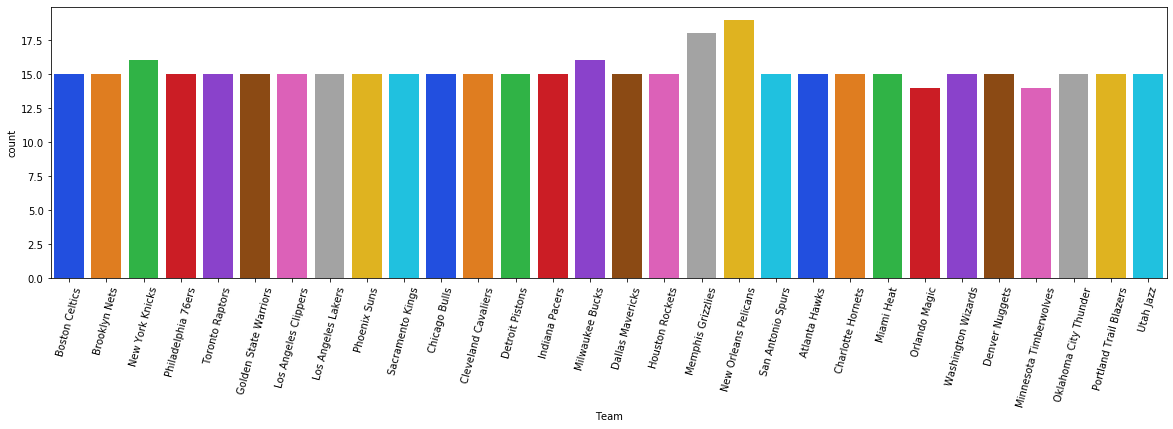

In [32]:
plt.figure(figsize=(20,5))
map=sns.countplot(x='Team',data=sal,palette='bright')
map.set_xticklabels(map.get_xticklabels(),rotation=75)
plt.show()

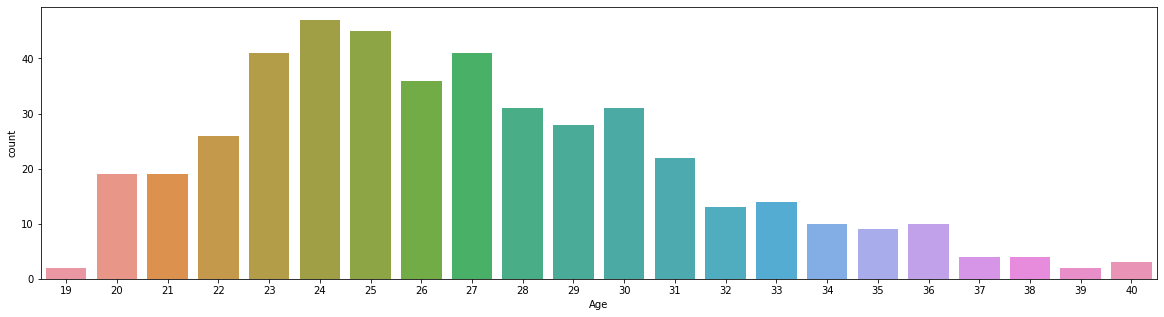

In [33]:
plt.figure(figsize=(20,5))
map=sns.countplot(x='Age',data=sal)
map.set_xticklabels(map.get_xticklabels(),rotation=0)
plt.show()

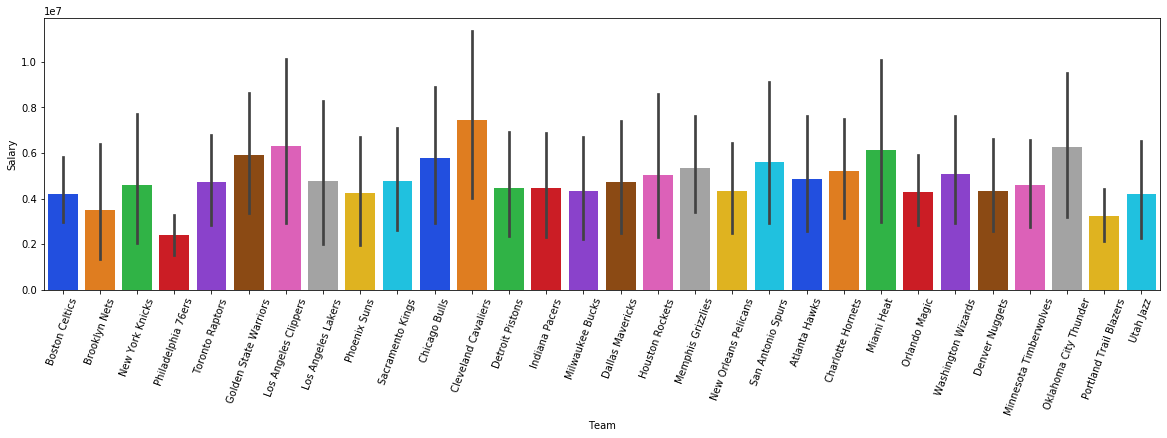

In [34]:
plt.figure(figsize=(20,5))
map1=sns.barplot(x='Team',y='Salary',palette='bright',data=sal)
map1.set_xticklabels(map1.get_xticklabels(),rotation=70)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

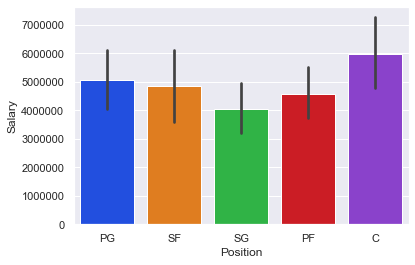

In [35]:
sns.set(style='darkgrid')
map2=sns.barplot(x='Position',y='Salary',data=sal,palette='bright')
map2.set_xticklabels(map2.get_xticklabels(),rotation=0)
plt.show

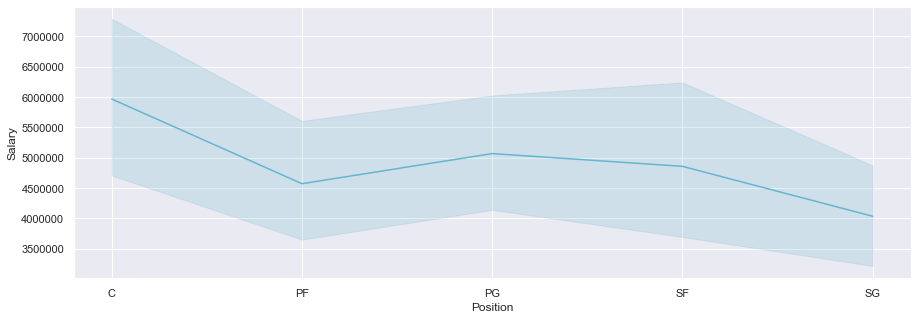

In [36]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Position',y='Salary',data=sal,palette='bright',color='c')


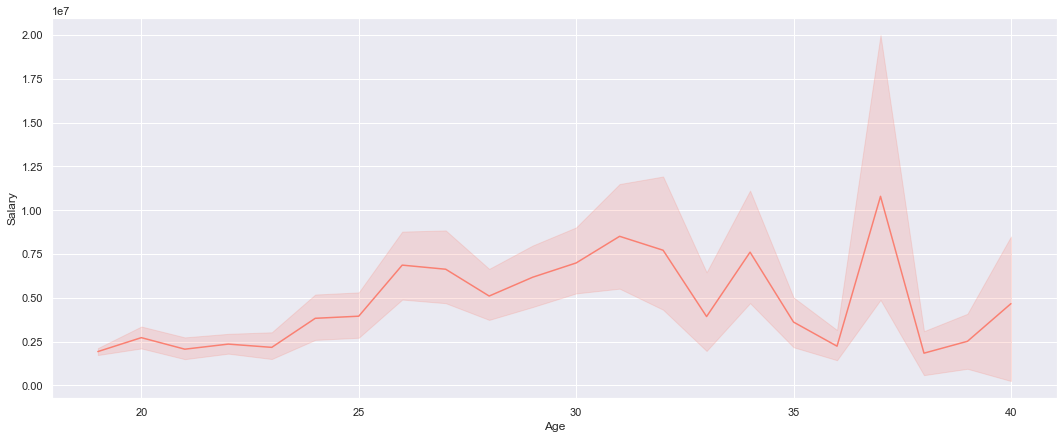

In [37]:
plt.figure(figsize=(18,7))
sns.lineplot(x='Age',y='Salary',data=sal,palette='bright',color='salmon')
plt.show()

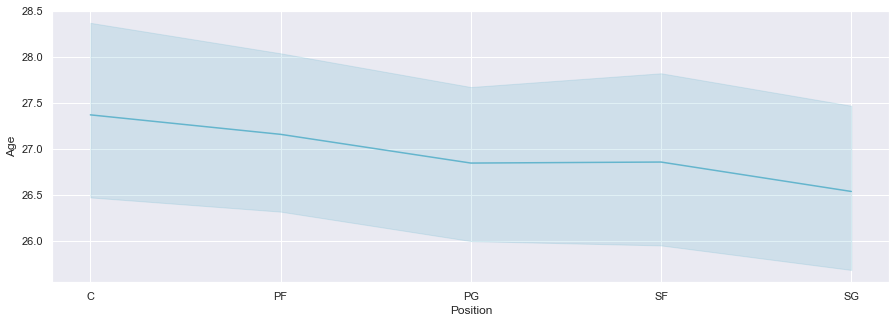

In [38]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Position',y='Age',data=sal,palette='bright',color='c')


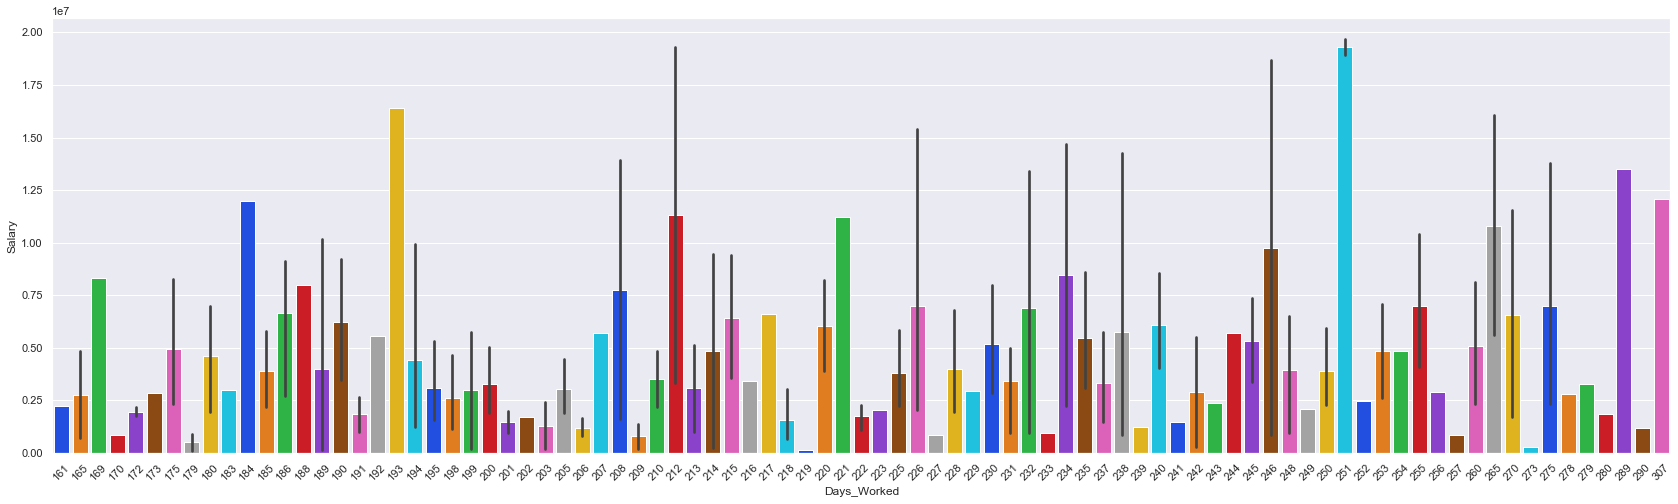

In [39]:
plt.figure(figsize=(29,8))
m=sns.barplot(x='Days_Worked',y='Salary',data=sal,palette='bright',color='c')
m.set_xticklabels(m.get_xticklabels(),rotation=45)
plt.show()

In [40]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 6 columns):
Team           457 non-null object
Position       457 non-null object
Age            457 non-null int64
Days_Worked    457 non-null int64
College        457 non-null object
Salary         457 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 21.5+ KB


In [41]:
for i in ('Team','Position','College'):
    le=LabelEncoder()
    sal[i]=le.fit_transform(sal[i])

In [42]:
sal

,Team,Position,Age,Days_Worked,College,Salary
0,1,2,25,180,93,7.730337e+06
1,1,3,25,235,52,6.796117e+06
2,1,4,27,205,8,4.842684e+06
3,1,4,22,185,33,1.148640e+06
4,1,1,29,231,45,5.000000e+06
...,...,...,...,...,...,...
452,28,1,20,234,45,2.239800e+06
453,28,2,26,203,11,2.433333e+06
454,28,2,24,179,45,9.000000e+05
455,28,0,26,256,45,2.900000e+06


In [43]:
cl=sal.columns.values
cl

array(['Team', 'Position', 'Age', 'Days_Worked', 'College', 'Salary'],
      dtype=object)

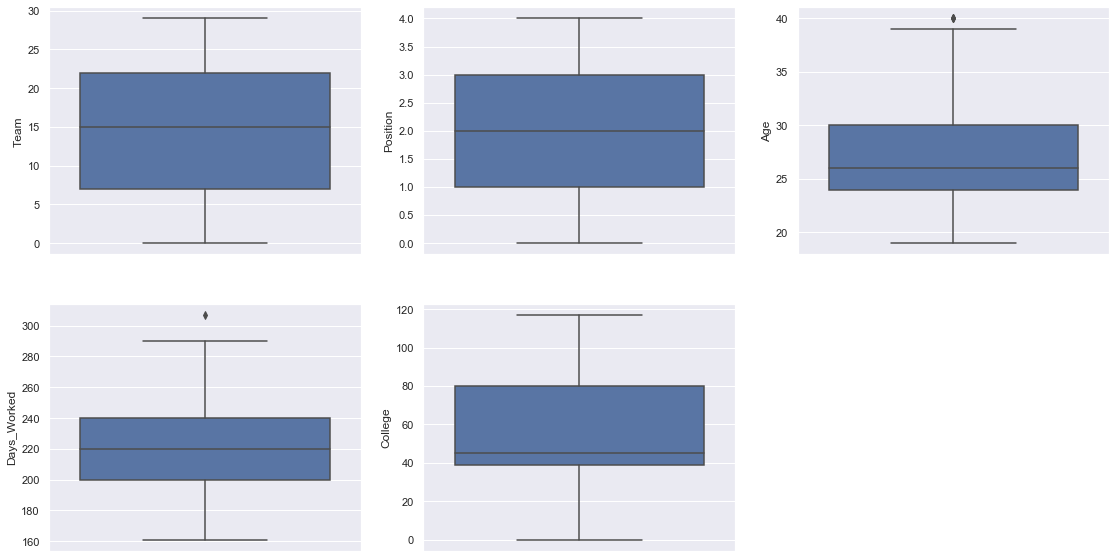

In [44]:
plt.figure(figsize=(19,10))
for i in range (0,5):
    plt.subplot(2,3,i+1)
    sns.boxplot(sal[cl[i]],orient='v')

In [45]:
z=np.abs(zscore(sal))
z

array([[1.57366745e+00, 5.13811794e-02, 4.40701238e-01, 1.57645405e+00,
        1.26761224e+00, 5.59609022e-01],
       [1.57366745e+00, 6.60170305e-01, 4.40701238e-01, 5.11666342e-01,
        1.09591201e-01, 3.78563045e-01],
       [1.57366745e+00, 1.37172179e+00, 1.39273529e-02, 6.27308418e-01,
        1.58756562e+00, 1.80484475e-16],
       ...,
       [1.56882854e+00, 5.13811794e-02, 6.68015534e-01, 1.61441988e+00,
        3.44723495e-01, 7.64067455e-01],
       [1.56882854e+00, 1.47448415e+00, 2.13386943e-01, 1.30894867e+00,
        3.44723495e-01, 3.76479997e-01],
       [1.56882854e+00, 1.47448415e+00, 2.13386943e-01, 3.59803041e-01,
        4.11904150e-01, 7.54905662e-01]])

In [46]:
print(np.where(z>3))

(array([ 33, 100, 109, 169, 251, 339, 405], dtype=int64), array([5, 5, 5, 5, 5, 5, 3], dtype=int64))


In [47]:
z[33][5]

3.49454973850236

In [48]:
salary=sal[(z<3).all(axis=1)]
salary

,Team,Position,Age,Days_Worked,College,Salary
0,1,2,25,180,93,7.730337e+06
1,1,3,25,235,52,6.796117e+06
2,1,4,27,205,8,4.842684e+06
3,1,4,22,185,33,1.148640e+06
4,1,1,29,231,45,5.000000e+06
...,...,...,...,...,...,...
452,28,1,20,234,45,2.239800e+06
453,28,2,26,203,11,2.433333e+06
454,28,2,24,179,45,9.000000e+05
455,28,0,26,256,45,2.900000e+06


In [49]:
print('the shape of sal is ',sal.shape ,'and shape of salary is', salary.shape)

the shape of sal is  (457, 6) and shape of salary is (450, 6)


In [50]:
sal.skew()

Team          -0.007368
Position      -0.014795
Age            0.626349
Days_Worked    0.113788
College        0.261126
Salary         1.595511
dtype: float64

In [51]:
for i in sal.columns:
    if sal.skew().loc[i]>0.55:
        sal[i]=np.log1p(sal[i])

In [52]:
sal.skew()

Team          -0.007368
Position      -0.014795
Age            0.284946
Days_Worked    0.113788
College        0.261126
Salary        -0.450091
dtype: float64

In [53]:
sal_corr=sal.corr()
sal_corr

,Team,Position,Age,Days_Worked,College,Salary
Team,1.000000,-0.009638,-0.049428,-0.001000,0.035438,-0.038983
Position,-0.009638,1.000000,-0.068663,-0.590791,0.036262,-0.126045
Age,-0.049428,-0.068663,1.000000,0.086766,-0.061303,0.205245
Days_Worked,-0.001000,-0.590791,0.086766,1.000000,-0.087271,0.125743
College,0.035438,0.036262,-0.061303,-0.087271,1.000000,-0.063189
Salary,-0.038983,-0.126045,0.205245,0.125743,-0.063189,1.000000


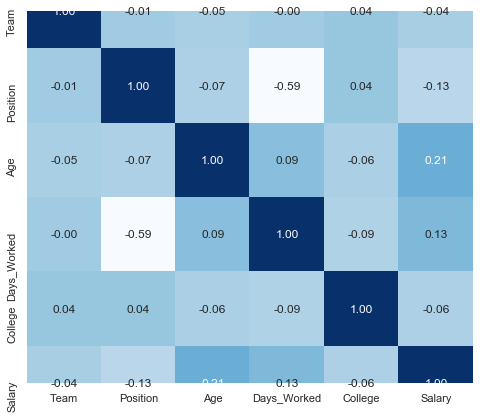

In [54]:
plt.figure(figsize=(8,10))
sns.heatmap(sal_corr,cmap='Blues',square=True,annot=True,fmt='.2f',cbar=False)
plt.show()

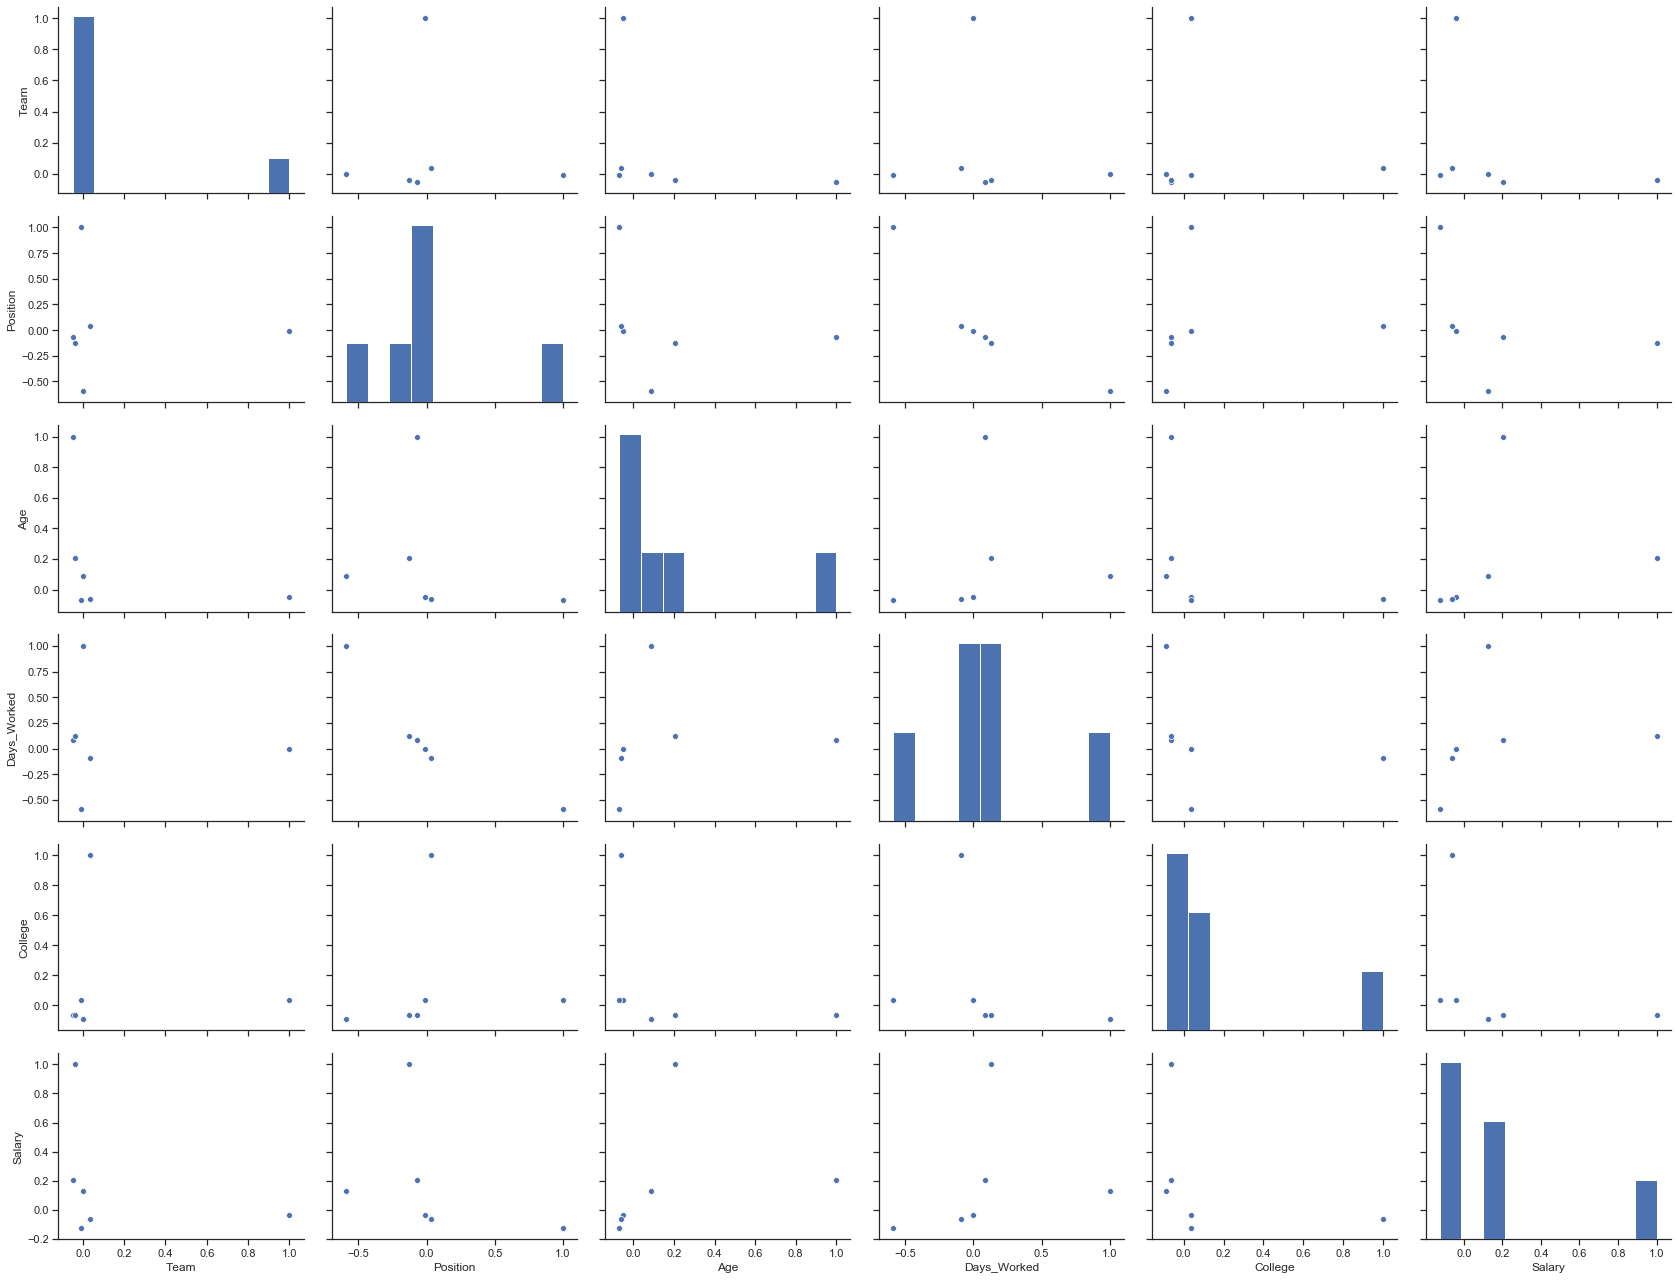

In [55]:
sns.set(style='ticks')
sns.pairplot(sal_corr,height=3,aspect=1.3)

In [56]:
sal

,Team,Position,Age,Days_Worked,College,Salary
0,1,2,3.258097,180,93,15.860663
1,1,3,3.258097,235,52,15.731862
2,1,4,3.332205,205,8,15.392980
3,1,4,3.135494,185,33,13.954090
4,1,1,3.401197,231,45,15.424949
...,...,...,...,...,...,...
452,28,1,3.044522,234,45,14.621898
453,28,2,3.295837,203,11,14.704773
454,28,2,3.218876,179,45,13.710151
455,28,0,3.295837,256,45,14.880222


In [57]:
x=sal.iloc[:,0:-1]
y=sal.iloc[:,-1]

In [58]:
print(x  ,'\n shape: ', x.shape)

     Team  Position       Age  Days_Worked  College
0       1         2  3.258097          180       93
1       1         3  3.258097          235       52
2       1         4  3.332205          205        8
3       1         4  3.135494          185       33
4       1         1  3.401197          231       45
..    ...       ...       ...          ...      ...
452    28         1  3.044522          234       45
453    28         2  3.295837          203       11
454    28         2  3.218876          179       45
455    28         0  3.295837          256       45
456    28         0  3.295837          231       43

[457 rows x 5 columns] 
 shape:  (457, 5)


In [59]:
ss=StandardScaler()
x=ss.fit_transform(x)
x

array([[-1.57366745, -0.05138118, -0.38989903, -1.57645405,  1.26761224],
       [-1.57366745,  0.66017031, -0.38989903,  0.51166634, -0.1095912 ],
       [-1.57366745,  1.37172179,  0.09215822, -0.62730842, -1.58756562],
       ...,
       [ 1.56882854, -0.05138118, -0.64502177, -1.61441988, -0.34472349],
       [ 1.56882854, -1.47448415, -0.14440589,  1.30894867, -0.34472349],
       [ 1.56882854, -1.47448415, -0.14440589,  0.35980304, -0.41190415]])

In [60]:
y=np.array(y)

y=y.reshape(-1,1)
y

array([[15.86066315],
       [15.73186212],
       [15.3929799 ],
       [13.95409006],
       [15.42494867],
       [16.30041729],
       [13.97333534],
       [14.58800528],
       [14.41674035],
       [15.04837427],
       [14.75912887],
       [15.74889545],
       [15.04676122],
       [14.37503548],
       [14.77753001],
       [15.04676122],
       [13.64716291],
       [14.22097633],
       [14.10480208],
       [15.65606035],
       [14.28541481],
       [11.80720572],
       [14.22097633],
       [16.79557071],
       [13.9467502 ],
       [13.76134683],
       [13.79668343],
       [13.76134683],
       [13.76134683],
       [16.23462955],
       [15.89495222],
       [14.30744506],
       [10.33815541],
       [16.94555521],
       [15.81737062],
       [13.64716291],
       [13.64716291],
       [14.26808887],
       [16.35316785],
       [15.13726666],
       [15.23420459],
       [14.85011787],
       [14.30827994],
       [13.76134683],
       [15.20180517],
       [12

In [61]:
print('the shape of x:', x.shape  ,'\n the shape of y', y.shape)

the shape of x: (457, 5) 
 the shape of y (457, 1)


In [63]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor


In [64]:
#algo. to find best random state

In [65]:
def mo(mod,x,y):
    max_r=0
    for i in range(33,120):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
        mod.fit(x_train,y_train)
        pred=mod.predict(x_test)
        r2score=r2_score(y_test,pred)
        MAE= mean_absolute_error(y_test,pred)
        MSE= mean_squared_error(y_test,pred)
        RMSE=np.sqrt(MSE)
        if r2score > max_r:
            max_r=r2score
            random_state=i
    print('the random state at ', mod, 'is \n:', random_state, 
          '\n with a r2 score of ',r2score,
          '\n mean abs error of ', MAE,
          '\n and mean squared error',MSE,
          '\n root mean sq error', RMSE)
    return random_state

In [66]:
lg=LinearRegression()
mo(lg,x,y)

the random state at  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is 
: 99 
 with a r2 score of  0.027595404970453874 
 mean abs error of  0.8984797493975469 
 and mean squared error 1.270043398258028 
 root mean sq error 1.1269620216573528


99

In [67]:
#checking for fit
lg_scr=cross_val_score(lg,x,y,cv=30,scoring='r2')
print('the r2 score at liner regression model is=', lg_scr.mean())

the r2 score at liner regression model is= -0.011914749962545419


In [68]:
#decisiontreeregressor
dtr=DecisionTreeRegressor()
dtr_para={'criterion':['mse','friedman_mse', 'mae'],'max_depth':[3,4,5]}
dtr_grid=GridSearchCV(dtr,dtr_para,cv=30)
dtr_grid.fit(x,y)
dtr_grid.best_params_

C:\Users\mishr\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'mae', 'max_depth': 4}

In [69]:
dtr=DecisionTreeRegressor(criterion='mae',max_depth=4)
mo(dtr,x,y)

the random state at  DecisionTreeRegressor(criterion='mae', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') is 
: 52 
 with a r2 score of  -0.3797188548837491 
 mean abs error of  1.038974487580115 
 and mean squared error 1.802030586912219 
 root mean sq error 1.3423973282572559


52

In [70]:
#fitting
dtr_score=cross_val_score(dtr,x,y,cv=30,scoring='r2')
print('the r2 score of dtr model is \t', dtr_score.mean())

the r2 score of dtr model is 	 -0.06930851238436367


In [71]:
#the data is fitting too poorly

In [72]:
knr=KNeighborsRegressor()
k_para={'n_neighbors': range(4,20),'algorithm':['ball_tree', 'kd_tree', 'brute']}
k_grid=GridSearchCV(knr,k_para,cv=30)
k_grid.fit(x,y)
k_grid.best_params_

C:\Users\mishr\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'algorithm': 'kd_tree', 'n_neighbors': 19}

In [73]:
knr=KNeighborsRegressor(algorithm='kd_tree',n_neighbors=19)
mo(knr,x,y)

the random state at  KNeighborsRegressor(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                    weights='uniform') is 
: 37 
 with a r2 score of  0.018493833021810513 
 mean abs error of  0.8829947238606831 
 and mean squared error 1.281930828064747 
 root mean sq error 1.1322238418549342


37

In [74]:
#fitting
knr_score=cross_val_score(knr,x,y,cv=30,scoring='r2')
print('the r2 score of knr model is:',knr_score.mean())

the r2 score of knr model is: -0.05513704092386236


In [75]:
svr=SVR()
svr_para={'kernel':['rbf','poly','linear'],'degree':[4,6,9]}
svr_grid=GridSearchCV(svr,svr_para,cv=30)
svr_grid.fit(x,y)
svr_grid.best_params_

C:\Users\mishr\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'degree': 4, 'kernel': 'linear'}

In [78]:
svr=SVR(kernel='linear',degree=4)
mo(svr,x,y)

the random state at  SVR(C=1.0, cache_size=200, coef0=0.0, degree=4, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False) is 
: 37 
 with a r2 score of  0.03278507927322971 
 mean abs error of  0.8852760766086547 
 and mean squared error 1.2632652406670002 
 root mean sq error 1.1239507287541568


37

In [80]:
svr_score=cross_val_score(svr,x,y,cv=30,scoring='r2')
print('the r2 score of svr model is:', svr_score.mean())

the r2 score of svr model is: -0.01575008042088287


In [ ]:
#randomforestregressor

In [83]:
rfc=RandomForestRegressor()
rfc_para={'n_estimators':[100,200,300],'criterion':['mse','mae'],'max_depth': range(3,8)}
rfc_grid=GridSearchCV(rfc,rfc_para,cv=30)
rfc_grid.fit(x,y)
rfc_grid.best_params_

C:\Users\mishr\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'mse', 'max_depth': 3, 'n_estimators': 300}

In [85]:
rfc=RandomForestRegressor(n_estimators=300,criterion='mse',max_depth=3)
mo(rfc,x,y)

the random state at  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) is 
: 99 
 with a r2 score of  -0.1028088157341891 
 mean abs error of  0.9547732455647219 
 and mean squared error 1.4403624408226947 
 root mean sq error 1.2001510075080948


99

In [87]:
#fitting
rfc_score=cross_val_score(rfc,x,y,cv=30,scoring='r2')
print('r2 score at rfc:', rfc_score.mean())

r2 score at rfc: -0.0031618523775451455


In [89]:
gbr=GradientBoostingRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=85)

para= {"learning_rate": [0.0001,0.1,1.0], "n_estimators":[250,500]}

gbgs= GridSearchCV(gbr,para,cv=15)
gbgs.fit(x_train,y_train)
print("best parameters:", gbgs.best_params_)
print("\n best score:",gbgs.best_score_)

best parameters: {'learning_rate': 0.0001, 'n_estimators': 500}

 best score: -0.04049473791945037


C:\Users\mishr\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [90]:
gbr=GradientBoostingRegressor(learning_rate=0.0001,n_estimators=500)
mo(gbr,x,y)

the random state at  GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.0001, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) is 
: 59 
 with a r2 score of  -0.027954138619411317 
 mean abs error of  0.9565419589517418 
 and mean squared error 1.3425958434780252 
 root mean sq error 1.1587043814010651


59

In [91]:
lso=Lasso()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=85)
lso.fit(x_train,y_train)
lso.score(x_train,y_train)


0.0

In [ ]:
#too poor r2 score_data is not fitting properly

In [93]:
#model selected
mod=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=99)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
r2score=r2_score(y_test,pred)
MAE= mean_absolute_error(y_test,pred)
MSE= mean_squared_error(y_test,pred)
RMSE=np.sqrt(MSE)
print(' the model is coming up with a r2 score of ',r2score,
      '\n mean abs error of ', MAE,
      '\n and mean squared error',MSE,
      '\n root mean sq error', RMSE)

 the model is coming up with a r2 score of  0.08304772631604951 
 mean abs error of  0.9623474389984576 
 and mean squared error 1.4035321393199633 
 root mean sq error 1.1847076176508546


In [94]:
import joblib
joblib.dump(mod,'salary.pkl')


['salary.pkl']